In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from prepare import prepare_nba, nba_split

In [2]:
df = pd.read_csv("nba_stats.csv")

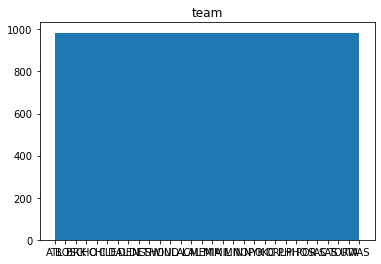

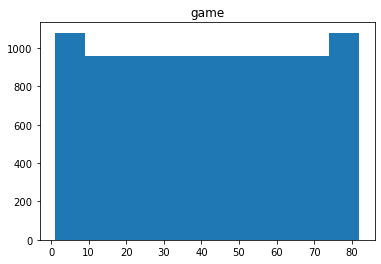

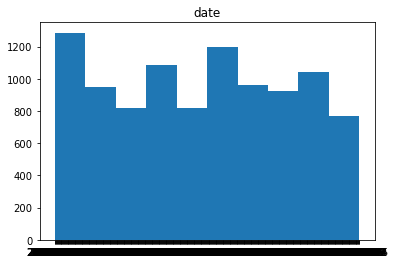

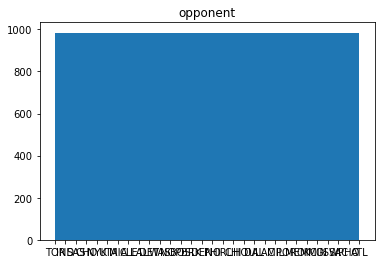

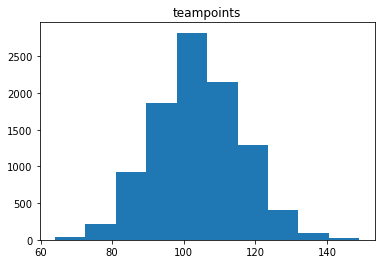

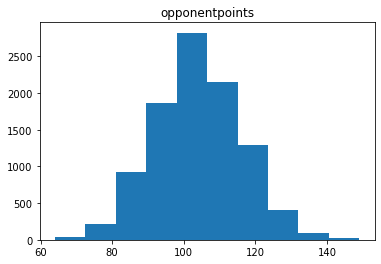

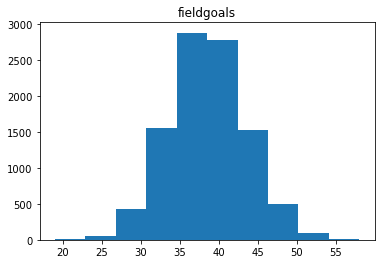

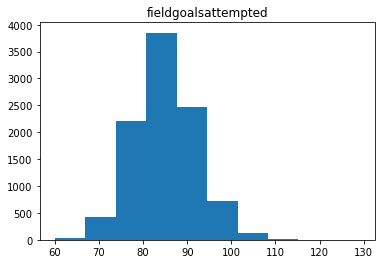

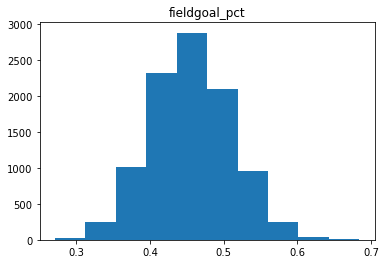

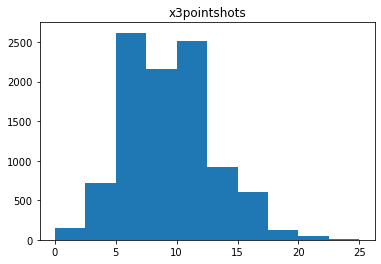

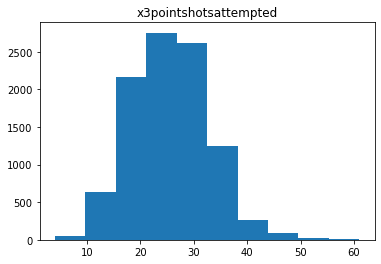

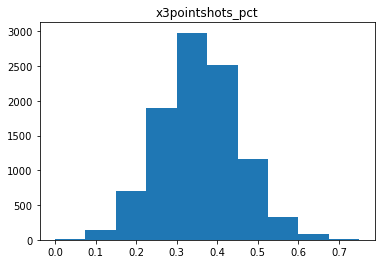

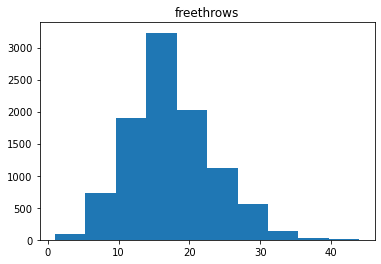

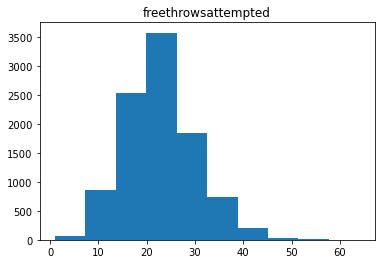

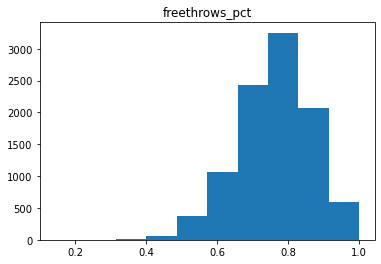

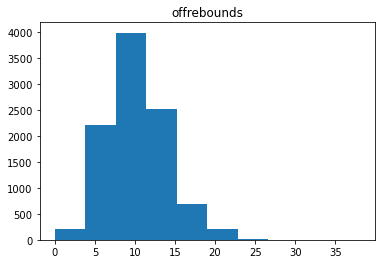

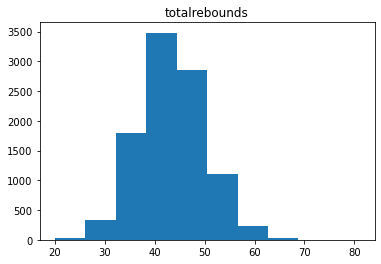

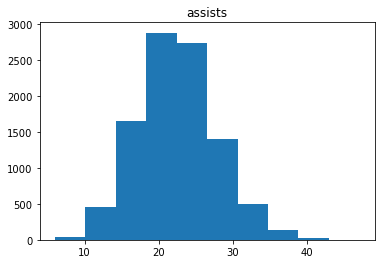

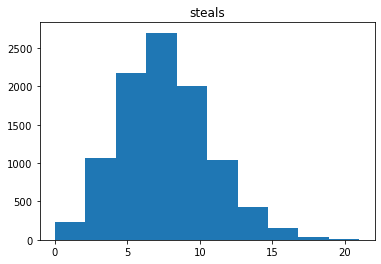

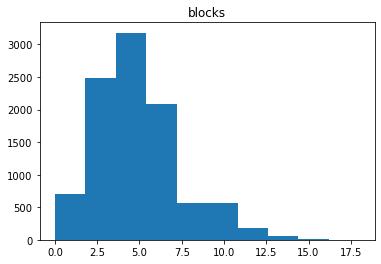

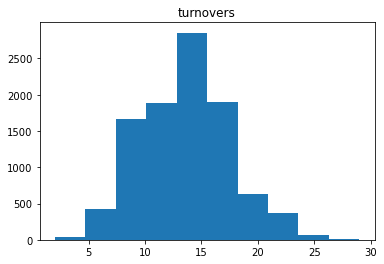

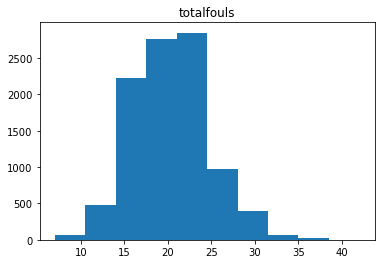

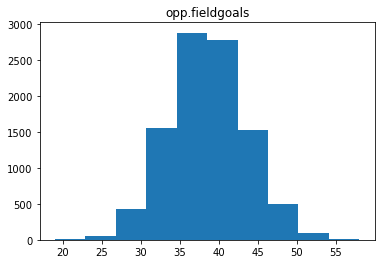

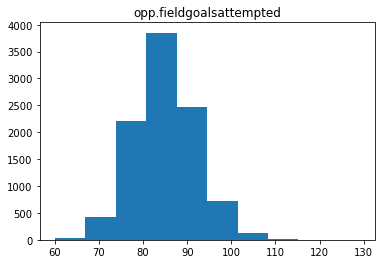

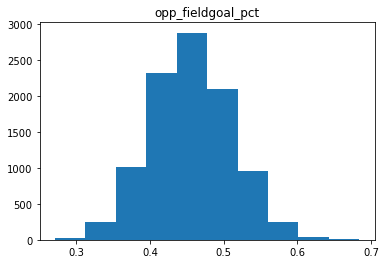

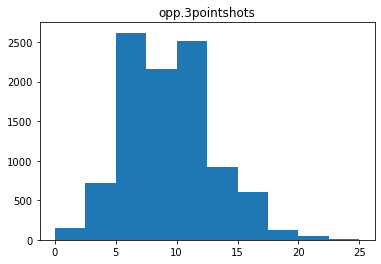

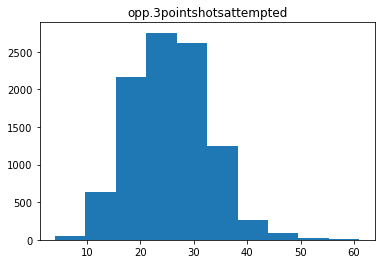

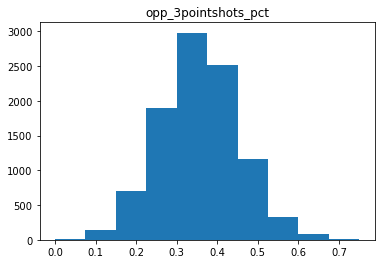

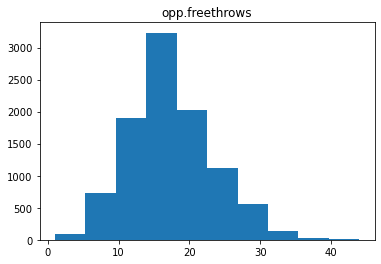

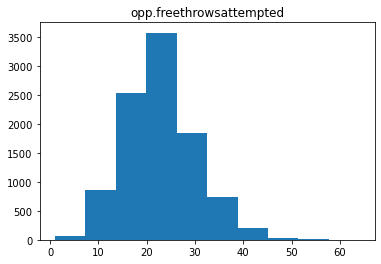

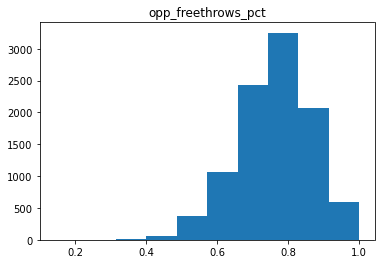

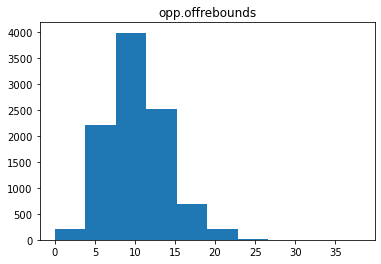

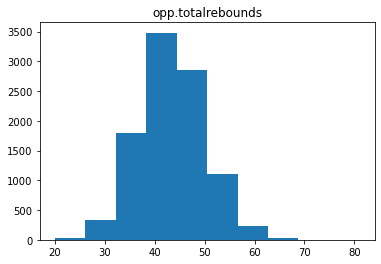

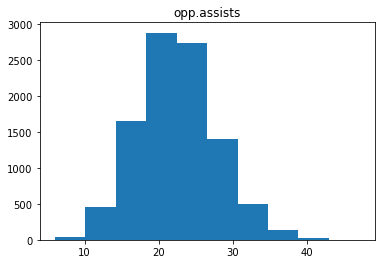

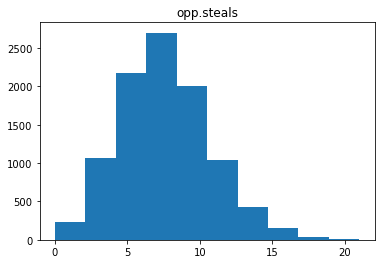

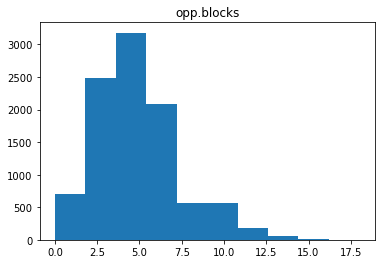

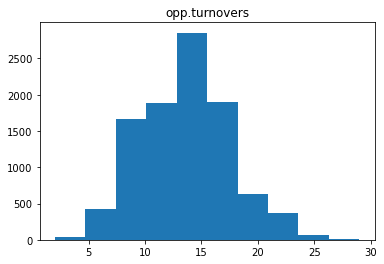

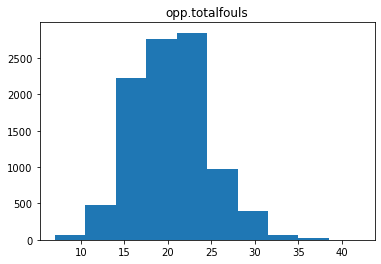

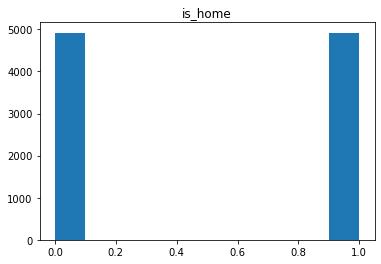

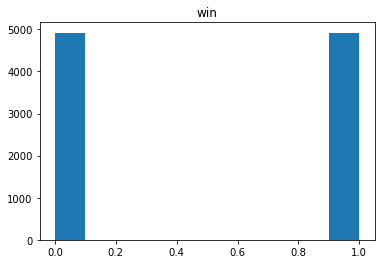

In [3]:
df = prepare_nba(df)

# Some Initial Thoughts
1. Does free throws attempted influence a win?
2. Can more rebounds influence a win?
3. Can more assist influence a win?
4. Can more blocks influence a win?

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, validate, test = nba_split(df)

The shape of the train data set is (5510, 40)
The shape of the validate data set is (2362, 40)
The shape of the test data set is (1968, 40)


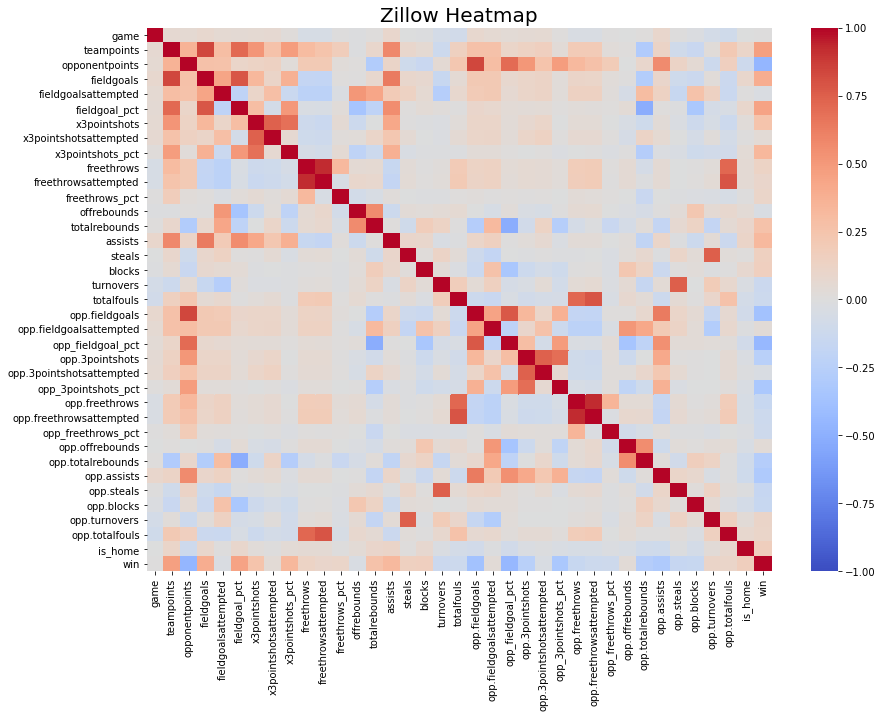

In [6]:
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(),
            vmin = -1, 
            cmap='coolwarm',
           annot=False).set_title("Zillow Heatmap", fontsize=20);

In [7]:
train.corr()

,game,teampoints,opponentpoints,fieldgoals,fieldgoalsattempted,fieldgoal_pct,x3pointshots,x3pointshotsattempted,x3pointshots_pct,freethrows,...,opp_freethrows_pct,opp.offrebounds,opp.totalrebounds,opp.assists,opp.steals,opp.blocks,opp.turnovers,opp.totalfouls,is_home,win
game,1.000000,0.063615,0.062266,0.083602,0.056187,0.053454,0.059614,0.065188,0.019491,-0.047742,...,0.001227,-0.000753,0.015617,0.092370,0.001121,-0.018222,-0.074984,-0.099854,-0.006308,0.004817
teampoints,0.063615,1.000000,0.359955,0.842382,0.290337,0.715916,0.517486,0.261195,0.479659,0.307782,...,0.023883,0.012581,-0.294783,0.118153,-0.099355,-0.141265,0.023673,0.211711,0.104941,0.464463
opponentpoints,0.062266,0.359955,1.000000,0.266241,0.264015,0.105016,0.127749,0.146997,0.028565,0.209250,...,0.188241,-0.006790,0.090039,0.567365,0.120095,0.048782,-0.123505,0.161088,-0.110338,-0.453157
fieldgoals,0.083602,0.842382,0.266241,1.000000,0.441182,0.781449,0.335648,0.110334,0.370546,-0.175110,...,0.024614,0.001175,-0.280680,0.099196,-0.106245,-0.132803,0.030185,-0.126203,0.086800,0.395628
fieldgoalsattempted,0.056187,0.290337,0.264015,0.441182,1.000000,-0.210209,0.107202,0.282411,-0.134798,-0.219768,...,0.018692,-0.056606,0.300436,0.140272,-0.155039,0.261767,0.143305,-0.133783,0.006227,-0.024302
fieldgoal_pct,0.053454,0.715916,0.105016,0.781449,-0.210209,1.000000,0.290738,-0.076147,0.500506,-0.035491,...,0.012419,0.040752,-0.512166,0.008586,-0.008564,-0.323862,-0.066028,-0.042003,0.090389,0.449377
x3pointshots,0.059614,0.517486,0.127749,0.335648,0.107202,0.290738,1.000000,0.747792,0.682672,-0.112917,...,-0.002887,-0.039094,-0.103533,0.035799,-0.025877,-0.116424,-0.049716,-0.117668,0.028934,0.255023
x3pointshotsattempted,0.065188,0.261195,0.146997,0.110334,0.282411,-0.076147,0.747792,1.000000,0.065583,-0.103368,...,0.009610,-0.061481,0.121920,0.061909,-0.005162,-0.068586,0.020814,-0.077157,0.001239,0.043185
x3pointshots_pct,0.019491,0.479659,0.028565,0.370546,-0.134798,0.500506,0.682672,0.065583,1.000000,-0.058175,...,-0.016577,0.005665,-0.272699,-0.022265,-0.034514,-0.104403,-0.086471,-0.092760,0.043642,0.328848
freethrows,-0.047742,0.307782,0.209250,-0.175110,-0.219768,-0.035491,-0.112917,-0.103368,-0.058175,1.000000,...,0.008914,0.047536,-0.065225,0.052274,-0.007591,0.006271,0.027326,0.721871,0.050383,0.126621


# Thoughts:
1. Team points and opponent points show a high correlation to other variables. These are probably going to be dropped as if you score more points, opponent scores more you will win the game. 
1. Look into field goal pct or field goals attempted
1. Also look into 3 pt pct, assists, total rebounds
1. Interesting that the home team does not seem to correlate with a win. Will look into this more.

In [8]:
train.columns

Index(['team', 'game', 'date', 'opponent', 'teampoints', 'opponentpoints',
       'fieldgoals', 'fieldgoalsattempted', 'fieldgoal_pct', 'x3pointshots',
       'x3pointshotsattempted', 'x3pointshots_pct', 'freethrows',
       'freethrowsattempted', 'freethrows_pct', 'offrebounds', 'totalrebounds',
       'assists', 'steals', 'blocks', 'turnovers', 'totalfouls',
       'opp.fieldgoals', 'opp.fieldgoalsattempted', 'opp_fieldgoal_pct',
       'opp.3pointshots', 'opp.3pointshotsattempted', 'opp_3pointshots_pct',
       'opp.freethrows', 'opp.freethrowsattempted', 'opp_freethrows_pct',
       'opp.offrebounds', 'opp.totalrebounds', 'opp.assists', 'opp.steals',
       'opp.blocks', 'opp.turnovers', 'opp.totalfouls', 'is_home', 'win'],
      dtype='object')

In [9]:
from scipy import stats

In [10]:
win = train[train.win == 1]
loss = train[train.win == 0]
home = train[train.is_home == 1]
away = train[train.is_home == 0]

# Does field goal percentage influence a win?
- $H_0$:The average field goal percentage is the same when winning a game.
- $H_a$:The average field goal percentage is not the same when winning a game.
- Alpha = .05

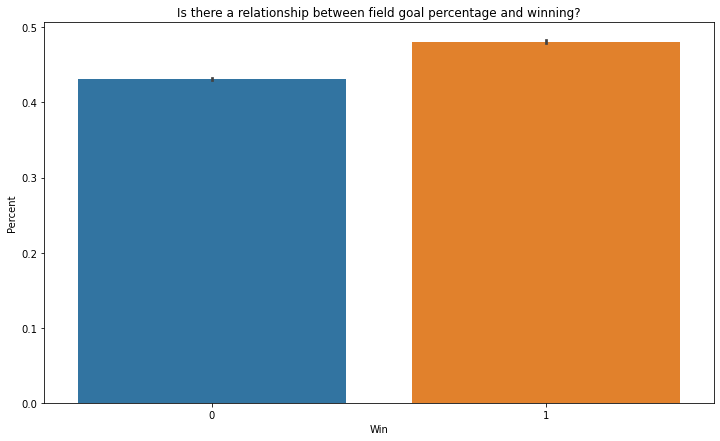

In [11]:
plt.figure(figsize=(12,7))
sns.barplot(x= 'win', y = 'fieldgoal_pct', data = train)
plt.title('Is there a relationship between field goal percentage and winning?')
plt.ylabel('Percent')
plt.xlabel('Win')
plt.show()

In [12]:
alpha = .05

t, p = stats.ttest_ind(win['fieldgoal_pct'], loss['fieldgoal_pct'])

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")
print(f'The p-value is {p}.')

We reject the null hypothesis.
The p-value is 3.841116279171387e-272.


# Does field goals attempted influence a win?
- $H_0$:The average field goal attempted is the same when winning a game.
- $H_a$:The average field goal attempted is not the same when winning a game.
- Alpha = .05

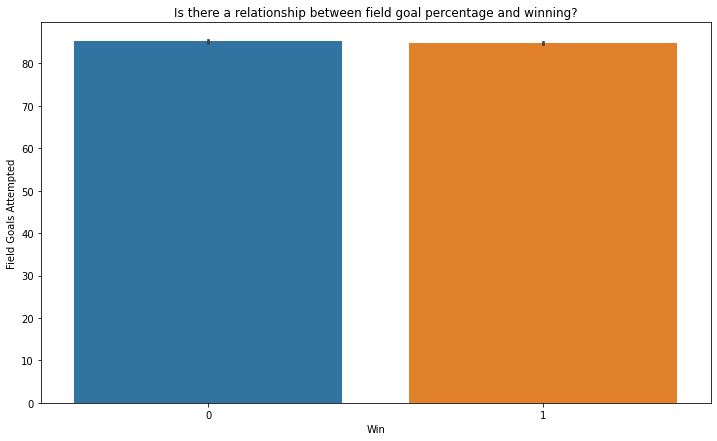

In [13]:
plt.figure(figsize=(12,7))
sns.barplot(x= 'win', y = 'fieldgoalsattempted', data = train)
plt.title('Is there a relationship between field goal percentage and winning?')
plt.ylabel('Field Goals Attempted')
plt.xlabel('Win')
plt.show()

In [14]:
alpha = .05

t, p = stats.ttest_ind(win['fieldgoalsattempted'], loss['fieldgoalsattempted'])

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")
print(f'The p-value is {p}.')

We fail to reject the null hypothesis.
The p-value is 0.07126993128382714.


# Does 3 point shot percentage influence a win?
- $H_0$:The average 3 point shot percentage is the same when winning a game.
- $H_a$:The average 3 point shot percentage is not the same when winning a game.
- Alpha = .05

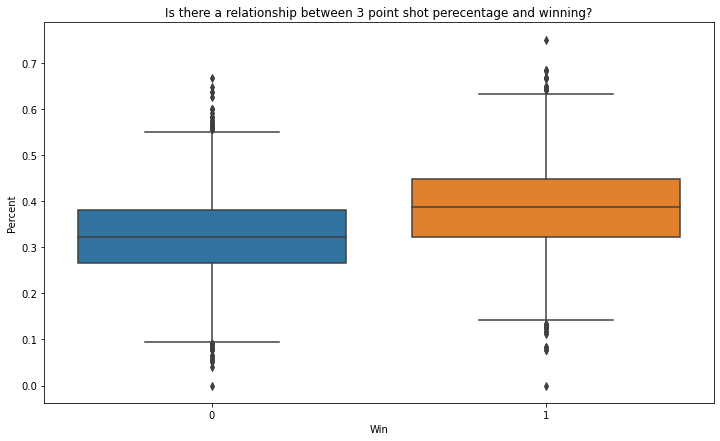

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x= 'win', y = 'x3pointshots_pct', data = train)
plt.title('Is there a relationship between 3 point shot perecentage and winning?')
plt.ylabel('Percent')
plt.xlabel('Win')
plt.show()

In [16]:
alpha = .05

t, p = stats.ttest_ind(win['x3pointshots_pct'], loss['x3pointshots_pct'])

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")
print(f'The p-value is {p}.')

We reject the null hypothesis.
The p-value is 4.263656114768551e-139.


# Does assists influence a win?
- $H_0$:The average assists is the same when winning a game.
- $H_a$:The average assists is not the same when winning a game.
- Alpha = .05

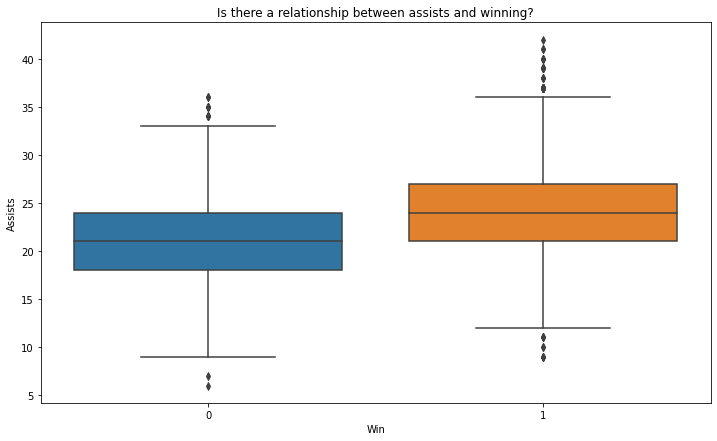

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(x= 'win', y = 'assists', data = train)
plt.title('Is there a relationship between assists and winning?')
plt.ylabel('Assists')
plt.xlabel('Win')
plt.show()

In [18]:
alpha = .05

t, p = stats.ttest_ind(win['assists'], loss['assists'])

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")
print(f'The p-value is {p}.')

We reject the null hypothesis.
The p-value is 8.954365130623687e-136.


# Does total rebounds influence a win?
- $H_0$:The average total rebounds is the same when winning a game.
- $H_a$:The average total rebounds is not the same when winning a game.
- Alpha = .05

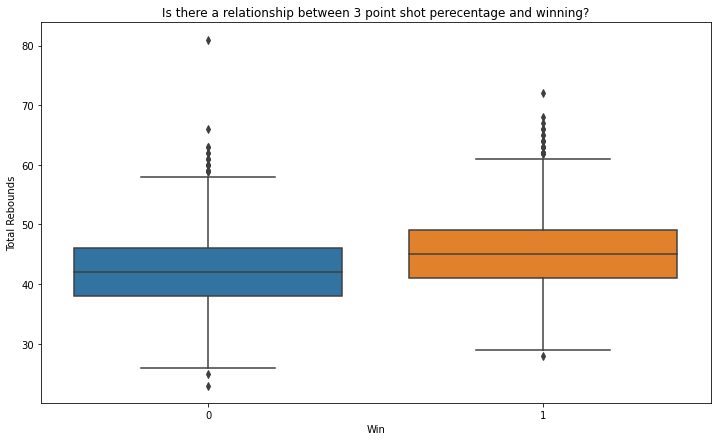

In [19]:
plt.figure(figsize=(12,7))
sns.boxplot(x= 'win', y = 'totalrebounds', data = train)
plt.title('Is there a relationship between 3 point shot perecentage and winning?')
plt.ylabel('Total Rebounds')
plt.xlabel('Win')
plt.show()

In [20]:
alpha = .05

t, p = stats.ttest_ind(win['totalrebounds'], loss['totalrebounds'])

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")
print(f'The p-value is {p}.')

We reject the null hypothesis.
The p-value is 1.7058686195606687e-86.


# Does having home court influence a win?
- $H_0$:There is no significance in home court when winning a game.
- $H_a$:The is significance in home court when winning a game.
- Alpha = .05

<Figure size 864x504 with 0 Axes>

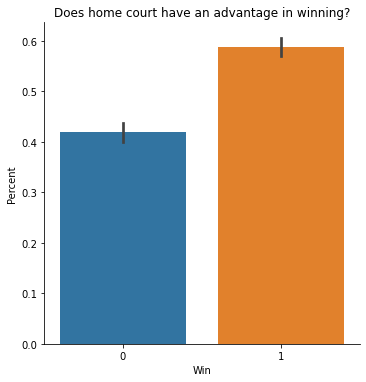

In [21]:
plt.figure(figsize=(12,7))
sns.catplot(x="win", y='is_home', kind="bar", data=train)
plt.title('Does home court have an advantage in winning?')
plt.ylabel('Percent')
plt.xlabel('Win')
plt.show()

In [22]:
alpha = .05
ctab = pd.crosstab(train.win, train.is_home)
ctab

is_home,0,1
win,,
0,1586,1142
1,1149,1633


In [23]:
chi2, p, degf, expected = stats.chi2_contingency(ctab)

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")
print(f'The p-value is {p}.')


We reject the null hypothesis.
The p-value is 1.0815593274503253e-35.


# Take aways:
    - We were able to reject the null hypothesis on all tests except for field goals attempted. 
    - Suprisingly if a team shoots the ball more regardless if they make it or not, it does not mean you will win more.
    - The averages in rebounds and assist were pretty close whether you win or lose. This may suggest this slight advantage may ifluence a team winning
    - Home court advantage does help influence wins
    - Further testing will be performed (Recursive Feature Elemination & SelectKBest) to see which features will influence a win.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from explore import add_scaled_columns, rfe_ranker, select_kbest, add_scaled_columns

In [25]:
train.columns

Index(['team', 'game', 'date', 'opponent', 'teampoints', 'opponentpoints',
       'fieldgoals', 'fieldgoalsattempted', 'fieldgoal_pct', 'x3pointshots',
       'x3pointshotsattempted', 'x3pointshots_pct', 'freethrows',
       'freethrowsattempted', 'freethrows_pct', 'offrebounds', 'totalrebounds',
       'assists', 'steals', 'blocks', 'turnovers', 'totalfouls',
       'opp.fieldgoals', 'opp.fieldgoalsattempted', 'opp_fieldgoal_pct',
       'opp.3pointshots', 'opp.3pointshotsattempted', 'opp_3pointshots_pct',
       'opp.freethrows', 'opp.freethrowsattempted', 'opp_freethrows_pct',
       'opp.offrebounds', 'opp.totalrebounds', 'opp.assists', 'opp.steals',
       'opp.blocks', 'opp.turnovers', 'opp.totalfouls', 'is_home', 'win'],
      dtype='object')

In [26]:
train.head()

,team,game,date,opponent,teampoints,opponentpoints,fieldgoals,fieldgoalsattempted,fieldgoal_pct,x3pointshots,...,opp_freethrows_pct,opp.offrebounds,opp.totalrebounds,opp.assists,opp.steals,opp.blocks,opp.turnovers,opp.totalfouls,is_home,win
7544,BRK,1,2017-10-18,IND,131,140,45,94,0.479,12,...,0.781,14,47,29,12,9,14,25,0,0
3403,IND,42,2016-01-19,PHO,97,94,34,83,0.410,4,...,0.931,13,53,15,4,2,22,23,0,1
8265,HOU,66,2018-03-11,DAL,105,82,39,84,0.464,17,...,0.611,17,53,27,5,2,10,18,0,1
2225,TOR,12,2014-11-21,MIL,124,82,45,86,0.523,15,...,0.688,8,30,19,11,1,12,18,1,1
5027,BOS,26,2016-12-16,CHO,96,88,34,78,0.436,9,...,0.842,16,53,21,10,4,12,21,1,1


def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    scaler.fit(train[columns_to_scale])
    
    train_scaled = pd.DataFrame(scaler.transform(train[columns_to_scale]), 
                            columns=new_column_names, 
                            index=train.index)
    validate_scaled = pd.DataFrame(scaler.transform(validate[columns_to_scale]), 
                            columns=new_column_names, 
                            index=validate.index)
    test_scaled = pd.DataFrame(scaler.transform(test[columns_to_scale]), 
                            columns=new_column_names, 
                            index=test.index)
    return train_scaled, validate_scaled, test_scaled

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
columns_to_scale = train.drop(columns=['team', 'game', 'date','opponent', 'win', 'teampoints',
       'opponentpoints'])

In [29]:
columns_to_scale.columns

Index(['fieldgoals', 'fieldgoalsattempted', 'fieldgoal_pct', 'x3pointshots',
       'x3pointshotsattempted', 'x3pointshots_pct', 'freethrows',
       'freethrowsattempted', 'freethrows_pct', 'offrebounds', 'totalrebounds',
       'assists', 'steals', 'blocks', 'turnovers', 'totalfouls',
       'opp.fieldgoals', 'opp.fieldgoalsattempted', 'opp_fieldgoal_pct',
       'opp.3pointshots', 'opp.3pointshotsattempted', 'opp_3pointshots_pct',
       'opp.freethrows', 'opp.freethrowsattempted', 'opp_freethrows_pct',
       'opp.offrebounds', 'opp.totalrebounds', 'opp.assists', 'opp.steals',
       'opp.blocks', 'opp.turnovers', 'opp.totalfouls', 'is_home'],
      dtype='object')

In [30]:
columns_to_scale = (['fieldgoals', 'fieldgoalsattempted', 'fieldgoal_pct', 'x3pointshots',
       'x3pointshotsattempted', 'x3pointshots_pct', 'freethrows',
       'freethrowsattempted', 'freethrows_pct', 'offrebounds', 'totalrebounds',
       'assists', 'steals', 'blocks', 'turnovers', 'totalfouls',
       'opp.fieldgoals', 'opp.fieldgoalsattempted', 'opp_fieldgoal_pct',
       'opp.3pointshots', 'opp.3pointshotsattempted', 'opp_3pointshots_pct',
       'opp.freethrows', 'opp.freethrowsattempted', 'opp_freethrows_pct',
       'opp.offrebounds', 'opp.totalrebounds', 'opp.assists', 'opp.steals',
       'opp.blocks', 'opp.turnovers', 'opp.totalfouls', 'is_home'])

In [31]:
train_scaled, validate_scaled, test_scaled = add_scaled_columns(train,validate,test, MinMaxScaler(),columns_to_scale)

In [32]:
train_scaled.head()

,fieldgoals_scaled,fieldgoalsattempted_scaled,fieldgoal_pct_scaled,x3pointshots_scaled,x3pointshotsattempted_scaled,x3pointshots_pct_scaled,freethrows_scaled,freethrowsattempted_scaled,freethrows_pct_scaled,offrebounds_scaled,...,opp.freethrowsattempted_scaled,opp_freethrows_pct_scaled,opp.offrebounds_scaled,opp.totalrebounds_scaled,opp.assists_scaled,opp.steals_scaled,opp.blocks_scaled,opp.turnovers_scaled,opp.totalfouls_scaled,is_home_scaled
7544,0.657895,0.492754,0.490050,0.48,0.456140,0.533333,0.666667,0.483871,0.890315,0.289474,...,0.517857,0.744457,0.518519,0.519231,0.55,0.60,0.529412,0.444444,0.514286,0.0
3403,0.368421,0.333333,0.318408,0.16,0.280702,0.266667,0.571429,0.516129,0.690782,0.263158,...,0.464286,0.919487,0.481481,0.634615,0.20,0.20,0.117647,0.740741,0.457143,0.0
8265,0.500000,0.347826,0.452736,0.68,0.719298,0.504000,0.214286,0.193548,0.666278,0.157895,...,0.267857,0.546091,0.629630,0.634615,0.50,0.25,0.117647,0.296296,0.314286,0.0
2225,0.657895,0.376812,0.599502,0.60,0.368421,0.800000,0.428571,0.354839,0.757293,0.394737,...,0.517857,0.635939,0.296296,0.192308,0.30,0.55,0.058824,0.370370,0.314286,1.0
5027,0.368421,0.260870,0.383085,0.36,0.421053,0.428000,0.428571,0.387097,0.686114,0.131579,...,0.285714,0.815636,0.592593,0.634615,0.35,0.50,0.235294,0.370370,0.400000,1.0


In [33]:
train.head()

,team,game,date,opponent,teampoints,opponentpoints,fieldgoals,fieldgoalsattempted,fieldgoal_pct,x3pointshots,...,opp_freethrows_pct,opp.offrebounds,opp.totalrebounds,opp.assists,opp.steals,opp.blocks,opp.turnovers,opp.totalfouls,is_home,win
7544,BRK,1,2017-10-18,IND,131,140,45,94,0.479,12,...,0.781,14,47,29,12,9,14,25,0,0
3403,IND,42,2016-01-19,PHO,97,94,34,83,0.410,4,...,0.931,13,53,15,4,2,22,23,0,1
8265,HOU,66,2018-03-11,DAL,105,82,39,84,0.464,17,...,0.611,17,53,27,5,2,10,18,0,1
2225,TOR,12,2014-11-21,MIL,124,82,45,86,0.523,15,...,0.688,8,30,19,11,1,12,18,1,1
5027,BOS,26,2016-12-16,CHO,96,88,34,78,0.436,9,...,0.842,16,53,21,10,4,12,21,1,1


In [34]:
y_train = train['win']

In [35]:
y_train

7544    0
3403    1
8265    1
2225    1
5027    1
       ..
4159    1
898     0
1584    0
2751    0
8130    1
Name: win, Length: 5510, dtype: uint8

In [36]:
train_scaled.head()

,fieldgoals_scaled,fieldgoalsattempted_scaled,fieldgoal_pct_scaled,x3pointshots_scaled,x3pointshotsattempted_scaled,x3pointshots_pct_scaled,freethrows_scaled,freethrowsattempted_scaled,freethrows_pct_scaled,offrebounds_scaled,...,opp.freethrowsattempted_scaled,opp_freethrows_pct_scaled,opp.offrebounds_scaled,opp.totalrebounds_scaled,opp.assists_scaled,opp.steals_scaled,opp.blocks_scaled,opp.turnovers_scaled,opp.totalfouls_scaled,is_home_scaled
7544,0.657895,0.492754,0.490050,0.48,0.456140,0.533333,0.666667,0.483871,0.890315,0.289474,...,0.517857,0.744457,0.518519,0.519231,0.55,0.60,0.529412,0.444444,0.514286,0.0
3403,0.368421,0.333333,0.318408,0.16,0.280702,0.266667,0.571429,0.516129,0.690782,0.263158,...,0.464286,0.919487,0.481481,0.634615,0.20,0.20,0.117647,0.740741,0.457143,0.0
8265,0.500000,0.347826,0.452736,0.68,0.719298,0.504000,0.214286,0.193548,0.666278,0.157895,...,0.267857,0.546091,0.629630,0.634615,0.50,0.25,0.117647,0.296296,0.314286,0.0
2225,0.657895,0.376812,0.599502,0.60,0.368421,0.800000,0.428571,0.354839,0.757293,0.394737,...,0.517857,0.635939,0.296296,0.192308,0.30,0.55,0.058824,0.370370,0.314286,1.0
5027,0.368421,0.260870,0.383085,0.36,0.421053,0.428000,0.428571,0.387097,0.686114,0.131579,...,0.285714,0.815636,0.592593,0.634615,0.35,0.50,0.235294,0.370370,0.400000,1.0


In [49]:
rank = rfe_ranker(train_scaled,y_train, k=8)
rank.head(8)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


,Feature,Rank
0,fieldgoals_scaled,1
22,opp.freethrows_scaled,1
19,opp.3pointshots_scaled,1
31,opp.totalfouls_scaled,1
15,totalfouls_scaled,1
6,freethrows_scaled,1
16,opp.fieldgoals_scaled,1
3,x3pointshots_scaled,1


In [38]:
from sklearn.feature_selection import SelectKBest, f_regression

In [41]:
f_feature = select_kbest(train_scaled, y_train, k=8)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass k=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [42]:
f_feature

['fieldgoals_scaled',
 'fieldgoal_pct_scaled',
 'x3pointshots_pct_scaled',
 'assists_scaled',
 'opp.fieldgoals_scaled',
 'opp_fieldgoal_pct_scaled',
 'opp_3pointshots_pct_scaled',
 'opp.assists_scaled']

# Take aways:
1. I took the top eight features to be selected in both RFE and SelectKBest
1. Recursive Feature Elemination selected field_goals, opp.freethrows, opp.3pointshots, opp.totalfouls, totalfouls, freethrows, opp.fieldgoal and x3pointshots as the best features for model
2. SelectKBest selected 'fieldgoals_scaled', 'fieldgoal_pct, 'x3pointshots_pct, 'assists,'opp.fieldgoals', 'opp_fieldgoal_pct, 'opp_3pointshots_pct, 'opp.assists.
3. Going to use a combination of the two for modeling. fieldgoals_pct, opp.fieldgoals_pct, opp.3pointshots, 3pointshots, opp.totalfouls, totalfouls, assist, and opp.assist

# Modeling
### ESTABLISH A BASELINE

In [56]:
baseline_accuracy = round(train.win.mean(),2)
baseline_accuracy

0.5

# Linear Regression

In [ ]:
# Selecting the variables to run the model
X_train = 